In [99]:
a = ["aardvark",
"baboon",
"bird_other",
"buffalo",
"bushbaby",
"bushbuck",
"bushpig",
"civet",
"duiker_spp",
"eland",
"elephant",
'genet',
"ground_hornbill",
"guineafowl_crested",
"guineafowl_helmeted",
"hare",
"hartebeest",
"hippo",
"honey_badger",
"impala",
"kudu",
"lion",
"mongoose_banded",
"mongoose_bushy_tailed",
"mongoose_dwarf",
"mongoose_large_grey",
"mongoose_marsh",
'mongoose_other',
"mongoose_slender",
'mongoose_unknown',
'mongoose_white_tailed',
'monitor_lizard',
'nyala',
'oribi',
'pangolin',
'porcupine',
'reedbuck',
'reptile',
'rodent',
'sable_antelope',
'samango',
'serval',
'unknown_antelope',
'vervet',
'warthog',
'waterbuck',
'wildebeest']

d = {k:k for k in a}
print(d)

{'aardvark': 'aardvark', 'baboon': 'baboon', 'bird_other': 'bird_other', 'buffalo': 'buffalo', 'bushbaby': 'bushbaby', 'bushbuck': 'bushbuck', 'bushpig': 'bushpig', 'civet': 'civet', 'duiker_spp': 'duiker_spp', 'eland': 'eland', 'elephant': 'elephant', 'genet': 'genet', 'ground_hornbill': 'ground_hornbill', 'guineafowl_crested': 'guineafowl_crested', 'guineafowl_helmeted': 'guineafowl_helmeted', 'hare': 'hare', 'hartebeest': 'hartebeest', 'hippo': 'hippo', 'honey_badger': 'honey_badger', 'impala': 'impala', 'kudu': 'kudu', 'lion': 'lion', 'mongoose_banded': 'mongoose_banded', 'mongoose_bushy_tailed': 'mongoose_bushy_tailed', 'mongoose_dwarf': 'mongoose_dwarf', 'mongoose_large_grey': 'mongoose_large_grey', 'mongoose_marsh': 'mongoose_marsh', 'mongoose_other': 'mongoose_other', 'mongoose_slender': 'mongoose_slender', 'mongoose_unknown': 'mongoose_unknown', 'mongoose_white_tailed': 'mongoose_white_tailed', 'monitor_lizard': 'monitor_lizard', 'nyala': 'nyala', 'oribi': 'oribi', 'pangolin':

In [52]:
#This cell runs through all the images in the folder "interim_crops" and collects their file names,
#then breaks them down into component parts (spp, camera, etc)
import os
import pandas as pd
from tqdm import tqdm

In [53]:
# set this to spp if you want the finegrained or spp grouped if you want them grouped
# spp_or_sppgrouped = "spp"
spp_or_sppgrouped = "spp_grouped"
# spp_or_sppgrouped = "new_grouped" #this is ready for a new grouping in the future


if spp_or_sppgrouped == "spp":
    class_label_map={'aardvark': 'aardvark', 'baboon': 'baboon', 'bird_other': 'bird_other', 'buffalo': 'buffalo', 'bushbaby': 'bushbaby', 'bushbuck': 'bushbuck', 'bushpig': 'bushpig', 'civet': 'civet', 'duiker_spp': 'duiker_spp', 'eland': 'eland', 'elephant': 'elephant', 'genet': 'genet', 'ground_hornbill': 'ground_hornbill', 'guineafowl_crested': 'guineafowl_crested', 'guineafowl_helmeted': 'guineafowl_helmeted', 'hare': 'hare', 'hartebeest': 'hartebeest', 'hippo': 'hippo', 'honey_badger': 'honey_badger', 'impala': 'impala', 'kudu': 'kudu', 'lion': 'lion', 'mongoose_banded': 'mongoose_banded', 'mongoose_bushy_tailed': 'mongoose_bushy_tailed', 'mongoose_dwarf': 'mongoose_dwarf', 'mongoose_large_grey': 'mongoose_large_grey', 'mongoose_marsh': 'mongoose_marsh', 'mongoose_other': 'mongoose_other', 'mongoose_slender': 'mongoose_slender', 'mongoose_unknown': 'mongoose_unknown', 'mongoose_white_tailed': 'mongoose_white_tailed', 'monitor_lizard': 'monitor_lizard', 'nyala': 'nyala', 'oribi': 'oribi', 'pangolin': 'pangolin', 'porcupine': 'porcupine', 'reedbuck': 'reedbuck', 'reptile': 'reptile', 'rodent': 'rodent', 'sable_antelope': 'sable_antelope', 'samango': 'samango', 'serval': 'serval', 'unknown_antelope': 'unknown_antelope', 'vervet': 'vervet', 'warthog': 'warthog', 'waterbuck': 'waterbuck', 'wildebeest': 'wildebeest'}
elif spp_or_sppgrouped == "spp_grouped":
    #this is manually grouping based on either ecological categories or categories the first model run struggled with
    class_label_map = {
        'baboon' : 'primate',
        'bird_other' : 'bird',
        'buffalo' : 'hippo_buffalo_wildebeest',
        'bushbaby' : 'primate',
        'bushpig' : 'pig',
        'eland' : 'eland_hartebeest',
        'ground_hornbill' : 'bird',
        'guineafowl_crested' : 'bird',
        'guineafowl_helmeted' : 'bird',
        'hartebeest' : 'eland_hartebeest',
        'hippo' : 'hippo_buffalo_wildebeest',
        'mongoose_banded' : 'mongoose_spp',
        'mongoose_bushy_tailed' : 'mongoose_spp',
        'mongoose_dwarf' : 'mongoose_spp',
        'mongoose_large_grey' : 'mongoose_spp',
        'mongoose_marsh' : 'mongoose_spp',
        'mongoose_other' : 'mongoose_spp',
        'mongoose_slender' : 'mongoose_spp',
        'mongoose_unknown' : 'mongoose_spp',
        'mongoose_white_tailed' : 'mongoose_spp',
        'monitor_lizard' : 'reptile',
        'samango' : 'primate',
        'vervet' : 'primate',
        'warthog' : 'pig',
        'wildebeest' : 'hippo_buffalo_wildebeest',
        'snake' : 'reptile',
        'lizard' : 'reptile',
        'duiker_unknown' : 'duiker_spp',
        'duiker_red' : 'duiker_spp',
        'duiker_common' : 'duiker_spp'
    }

#this is ready to do a new grouping
# elif spp_or_sppgrouped == "new_grouped":
#     #this is manually grouping based on either ecological categories or categories the first model run struggled with
#     class_label_map = {
#         'baboon' : 'primate',
#         'bird_other' : 'bird',
#         'buffalo' : 'hippo_buffalo_wildebeest',
#         'bushbaby' : 'primate',
#         'bushpig' : 'pig',
#         'eland' : 'eland_hartebeest',
#         'ground_hornbill' : 'bird',
#         'guineafowl_crested' : 'bird',
#         'guineafowl_helmeted' : 'bird',
#         'hartebeest' : 'eland_hartebeest',
#         'hippo' : 'hippo_buffalo_wildebeest',
#         'mongoose_banded' : 'mongoose_spp',
#         'mongoose_bushy_tailed' : 'mongoose_spp',
#         'mongoose_dwarf' : 'mongoose_spp',
#         'mongoose_large_grey' : 'mongoose_spp',
#         'mongoose_marsh' : 'mongoose_spp',
#         'mongoose_other' : 'mongoose_spp',
#         'mongoose_slender' : 'mongoose_spp',
#         'mongoose_unknown' : 'mongoose_spp',
#         'mongoose_white_tailed' : 'mongoose_spp',
#         'monitor_lizard' : 'reptile',
#         'samango' : 'primate',
#         'vervet' : 'primate',
#         'warthog' : 'pig',
#         'wildebeest' : 'hippo_buffalo_wildebeest',
#         'snake' : 'reptile',
#         'lizard' : 'reptile',
#         'duiker_unknown' : 'duiker_spp',
#         'duiker_red' : 'duiker_spp',
#         'duiker_common' : 'duiker_spp'
#     }
else:
    print("GROUPING NOT SPECIFIED")



In [ ]:
gen_or_load = "load"
# gen_or_load = "gen"


# Define the root directory
# if this throws errors and can't find the file on the hard drive,
# restart my laptop and leave the external drive plugged in

if gen_or_load == "gen":
    root_path = '/mnt/d/cv4e_data/interim_crops'

    files = os.listdir(root_path) #this creates a list of all the images in this folder (interim_crops)
    # print(files)
    files = [file for file in files if not file.startswith('._')]
    #initialize an empty dataframe with these columns (all values are NA)
    df = pd.DataFrame(columns=['file_name', 'spp', 'spp_grouped', 'camera', 'img_id', 'crop_idx', 'MD_detection']) 
    for idx, file_name in tqdm(enumerate(files), total=len(files)): #run through all the files, enumerate takes both idx and file_name (or something else)
        # if idx % 20 ==0:
        #     print(f"{idx}/{len(files)}")
        if file_name.startswith('._'): #skip files that are hidden
            continue

        # create objects by breaking apart the file names
        # print(f"file_name : {file_name}") # file_name : aardvark-B05-38121_crop1_animal.JPG [this is for testing]
        spp = file_name.split('-')[0]
        camera = file_name.split('-')[1]
        temp = file_name.split('-')[2] #should be something like 38121_crop1_animal.JPG

        img_id = temp.split('_')[0] #should be 38121
        crop_idx = temp.split('_')[1] #should be crop1
        temp2 = temp.split('_')[2] #should be animal.JPG

        MD_detection = temp2.split('.')[0] #should be animal
        if MD_detection != 'animal': #skip everything that MD said was not animal - this worked
            continue

        spp_grouped = class_label_map.get(spp, spp)

    # append objects to dataframe
        df.at[idx, 'file_name'] = file_name
        df.at[idx, 'spp'] = spp #fill in species column in data frame
        df.at[idx, 'spp_grouped'] = spp_grouped #fill in grouped species column in data frame
        df.at[idx, 'camera'] = camera
        df.at[idx, 'img_id'] = img_id
        df.at[idx, 'crop_idx'] = crop_idx
        df.at[idx, 'MD_detection'] = MD_detection

    #this is used for testing
        # if idx > 10:
        #      break

    print(df)
    df = df[df['spp'] != 'bat'] #this is taking everything where spp is not bat
    #decided to skip the single bat image because it was making the train/val split harder

    #save df so I don't have to run this every time
    #this step has to happen here, otherwise it doesn't have the species grouped
    df.to_csv('data/cropped_instances_with_spp_grouped.csv', index=False)
elif gen_or_load == "load":
    df = pd.read_csv('/root/cv4e/data/cropped_instances_with_spp_grouped.csv')

#I think this is where I need to do my sorting and then save the df as a csv

100%|██████████| 56017/56017 [05:56<00:00, 156.99it/s]

                                   file_name         spp  \
0        aardvark-B05-38121_crop1_animal.JPG    aardvark   
1        aardvark-B05-38122_crop1_animal.JPG    aardvark   
2        aardvark-B05-38123_crop1_animal.JPG    aardvark   
3        aardvark-B05-38124_crop1_animal.JPG    aardvark   
4        aardvark-B05-38125_crop1_animal.JPG    aardvark   
...                                      ...         ...   
56012  wildebeest-I10-37916_crop1_animal.JPG  wildebeest   
56013  wildebeest-I10-37925_crop1_animal.JPG  wildebeest   
56014  wildebeest-I10-37948_crop1_animal.JPG  wildebeest   
56015  wildebeest-L11-36906_crop1_animal.JPG  wildebeest   
56016  wildebeest-L11-37766_crop1_animal.JPG  wildebeest   

                    spp_grouped camera img_id crop_idx MD_detection  
0                      aardvark    B05  38121    crop1       animal  
1                      aardvark    B05  38122    crop1       animal  
2                      aardvark    B05  38123    crop1       animal  

In [39]:
# #now can I read in the df? yes, and I shouldn't have to run the cell above again for this set of images
# df = pd.read_csv('/root/cv4e/data/cropped_instances.csv')

In [40]:
# df['spp'].unique() #testing, checks all the unique items in this list
# len(df['spp'].unique()) #testing, gives the number of items in this list

In [41]:
# #let's try to group the categories I need 
# #run through the df and edit the groups (which we had to do for the train/val split)
# for idx, row in df.iterrows(): 
#     if df.at[idx, 'spp'] in ['snake', 'lizard']:
#         df.at[idx, 'spp'] = 'reptile'

#     elif df.at[idx, 'spp'] in ['duiker_unknown', 'duiker_common', 'duiker_red']:
#         df.at[idx, 'spp'] = 'duiker_spp'

#     # this did not do what I thought it should, leaving it so I can think about why later
#     # else:
#     #     df.at[idx, 'spp'] = df.at[idx, 'spp'] #if not one of the categories I changed, keep the same

# df #look at the df

In [42]:
# print(df['spp'].unique()) #testing unique spp values
# len(df['spp'].unique()) #testing length of this list
# df.shape #gives you number of rows and columns for the df

In [43]:
# df = df[df['spp'] != 'bat'] #this is taking everything where spp is not bat
# #decided to skip the single bat image because it was making the train/val split harder

# #save df so I don't have to run this every time
# #this step has to happen here, otherwise it doesn't have the species grouped
# df.to_csv('data/cropped_instances.csv', index=False)


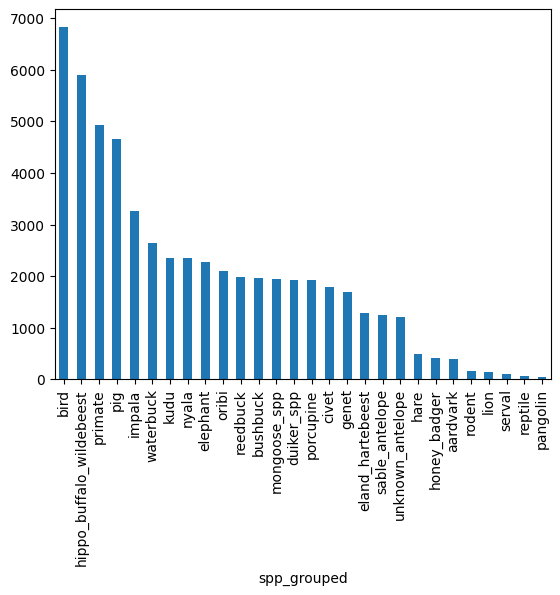

In [58]:
import matplotlib.pyplot as plt #ggplot for python

#plot a histogram of the instances of each spp classification
df["spp_grouped"].value_counts().plot(kind = "bar")

plt.show() #show the plot

This is what Peter put into chatgpt to figure out how to get a dictionary in the format necessary for using
the train/val split data. Yielded close to the code below

python. We have this csv ('/root/cv4e/data/cropped_instances.csv') which looks like 

file_name,spp,camera,img_id,crop_idx,MD_detection
aardvark-B05-38121_crop1_animal.JPG,aardvark,B05,38121,crop1,animal
aardvark-B05-38122_crop1_animal.JPG,aardvark,B05,38122,crop1,animal
aardvark-B05-38123_crop1_animal.JPG,aardvark,B05,38123,crop1,animal
aardvark-B05-38124_crop1_animal.JPG,aardvark,B05,38124,crop1,animal
aardvark-B05-38125_crop1_animal.JPG,aardvark,B05,38125,crop1,animal
aardvark-B05-38126_crop1_animal.JPG,aardvark,B05,38126,crop1,animal
aardvark-B05-38127_crop1_animal.JPG,aardvark,B05,38127,crop1,animal
aardvark-B05-38128_crop1_animal.JPG,aardvark,B05,38128,crop1,animal


And we want to have it converted into a nested dict like:

{'location-000': {'bear':4,'wolf':10},
 'location-001': {'bear':12,'elk':20}}



where location is the 'camera' column, and the species names are in the 'spp' col.




In [45]:
# #checking whether my df and the csv below are the same

# df.sample(4) #looks at the first 4 rows of the df

,file_name,spp,spp_grouped,camera,img_id,crop_idx,MD_detection
9699,bushbuck-K06-7150_crop1_animal.JPG,bushbuck,bushbuck,K06,7150,crop1,animal
9782,bushbuck-K06-7976_crop1_animal.JPG,bushbuck,bushbuck,K06,7976,crop1,animal
893,baboon-F05-1579_crop1_animal.JPG,baboon,primate,F05,1579,crop1,animal
4995,bird_other-L05-2834_crop2_animal.JPG,bird_other,bird,L05,2834,crop2,animal


In [46]:
#need to reform csv into dictionary to run megadetector function on for splitting train/test
#this code is based on the output from the chatgpt query above
#https://megadetector.readthedocs.io/en/latest/utils.html#megadetector.utils.split_locations_into_train_val.split_locations_into_train_val

import csv
from collections import defaultdict

# se this to spp if you want the finegrained or spp grouped if you want them grouped
# spp_or_sppgrouped = "spp"
# spp_or_sppgrouped = "spp_grouped"

#to do at some point: switch to iterating over df instead of reading csv
#I think I did this below, going to comment out this cell
#checked and cropped_instances_csv is the same info as df

# # # Initialize the result dictionary
# # result = defaultdict(lambda: defaultdict(int))
# # # lookup = defaultdict(lambda: defaultdict(str))

# # # Path to the CSV file
# # csv_file = '/root/cv4e/data/cropped_instances_with_spp_grouped.csv'

# # # Read the CSV file and process each row
# # with open(csv_file, mode='r') as file:
# #     reader = csv.DictReader(file)  # Read CSV into a dictionary format
# #     row_count = 0  # Initialize the row counter
# #     for row in reader:
# #         # if row_count >= 10000:  # Check if we've processed 1000 rows
# #         #     break  # Stop processing if 1000 rows are reached
# #         location = row['camera']        # Extract the camera (location) value
# #         species = row[spp_or_sppgrouped]            # Extract the species value
# #         # if species == 'bat': #checking
# #         #     continue #skip the bat image
# #         # elif species in ['lizard', 'snake']:
# #         #     species_new = "reptile" #assigning an object
# #         # elif species in ['duiker_unknown', 'duiker_common', 'duiker_red']: #grouping all duiker images
# #         #     species_new = "duiker_spp"
# #         # else:
# #         #     species_new = species

# #         #if species isn't in class_label_map, returns original species. if yes, returns value (new spp label)
# #         # species_new = class_label_map.get(species, species)
        
            
# #         # lookup[species] = species_new
# #         result[location][species] += 1  # Increment the count for this species at the location
# #         row_count += 1  # Increment the row counter



# # Convert the defaultdict to a regular dict for cleaner output
# #this line of code does the same as below, just slightly less clear
# # result = {location: dict(species_count) for location, species_count in result.items()}

# location_spp_dict = {}
# for location, species_count in result.items():
#     # Convert species_count (which is a defaultdict) to a regular dict
#     location_spp_dict[location] = dict(species_count)

# # Optionally, print the result to check the output
# import json
# print(json.dumps(location_spp_dict, indent=2))


{
  "B05": {
    "aardvark": 28,
    "primate": 34,
    "bird": 2,
    "hippo_buffalo_wildebeest": 156,
    "bushbuck": 1,
    "pig": 25,
    "civet": 9,
    "elephant": 15,
    "genet": 5,
    "hare": 16,
    "eland_hartebeest": 463,
    "impala": 33,
    "kudu": 28,
    "mongoose_spp": 6,
    "nyala": 2,
    "oribi": 40,
    "porcupine": 7,
    "reedbuck": 59,
    "sable_antelope": 218,
    "serval": 2,
    "unknown_antelope": 5,
    "waterbuck": 11
  },
  "B07": {
    "aardvark": 2,
    "primate": 43,
    "bird": 84,
    "hippo_buffalo_wildebeest": 2541,
    "bushbuck": 10,
    "pig": 29,
    "civet": 24,
    "duiker_spp": 26,
    "elephant": 10,
    "genet": 3,
    "hare": 5,
    "eland_hartebeest": 29,
    "honey_badger": 3,
    "impala": 54,
    "kudu": 59,
    "lion": 4,
    "mongoose_spp": 39,
    "nyala": 84,
    "oribi": 40,
    "reedbuck": 36,
    "sable_antelope": 15,
    "unknown_antelope": 33,
    "waterbuck": 11
  },
  "C06": {
    "aardvark": 28,
    "primate": 51,
    

In [47]:
#working toward an alphabetical list of categories
#but I think we did this below


In [87]:
#what if I try to run through the df instead of the csv
#can I do it by myself? only time will tell

# Assuming `df` is already your DataFrame


# se this to spp if you want the finegrained or spp grouped if you want them grouped
# spp_or_sppgrouped = "spp"
# spp_or_sppgrouped = "spp_grouped"

# Path to the CSV file
csv_file = '/root/cv4e/data/cropped_instances_with_spp_grouped.csv'
df = pd.read_csv(csv_file)
# Step 1: Group by 'camera' and 'spp', then count occurrences
grouped = df.groupby(['camera', 'grouped']).size().unstack(fill_value=0)

# Step 2: Convert the result to a nested dictionary, excluding species with 0 counts
camera_species_counts = {
    camera: {species: count for species, count in row.items() if count > 0}
    for camera, row in grouped.iterrows()
}

# Output the result
# print(camera_species_counts)

# Optionally, print the result to check the output
import json
print(json.dumps(camera_species_counts, indent=2))

#this looks like it did the thing we needed it to do



{
  "A06": {
    "bird": 54,
    "bushbuck": 1,
    "civet": 2,
    "elephant": 1,
    "genet": 17,
    "hare": 2,
    "hippo_buffalo_wildebeest": 46,
    "honey_badger": 1,
    "impala": 35,
    "kudu": 12,
    "mongoose_spp": 2,
    "oribi": 14,
    "pig": 12,
    "porcupine": 1,
    "primate": 8,
    "reedbuck": 24,
    "reptile": 2,
    "unknown_antelope": 6,
    "waterbuck": 3
  },
  "A08": {
    "bird": 47,
    "bushbuck": 8,
    "civet": 4,
    "elephant": 19,
    "genet": 55,
    "hare": 2,
    "hippo_buffalo_wildebeest": 17,
    "honey_badger": 20,
    "impala": 17,
    "kudu": 7,
    "mongoose_spp": 16,
    "nyala": 1,
    "oribi": 5,
    "pangolin": 8,
    "pig": 27,
    "porcupine": 17,
    "primate": 51,
    "reedbuck": 24,
    "rodent": 14,
    "sable_antelope": 5,
    "unknown_antelope": 3,
    "waterbuck": 10
  },
  "A10": {
    "bird": 312,
    "bushbuck": 26,
    "civet": 4,
    "duiker_spp": 2,
    "elephant": 16,
    "genet": 20,
    "hippo_buffalo_wildebeest": 8,
 

In [88]:
# dict(lookup).values() #list of all updated species classes

# #let's check the dictionary I made 

In [89]:
#import megadetector module from one directory up
import sys

# Add the parent directory to the sys.path
# sys.path.append('/root') #we know the parent directory is /root
sys.path.append('/root/MegaDetector') #we know the parent directory is /root
#MegaDetector is the repo

# Now you can import the module as usual
#megadetector is a Python module, within that module is a sub-module/directory called "utils", and 
#we think "split_locations_into_train_val" is a Python script
#with a function of the same name that we're going to use
from megadetector.utils.split_locations_into_train_val import split_locations_into_train_val





In [90]:
#in Python: main/positional argument - requires input
#key word/optional arguments - have a default value, you don't *have* to put something in

import random

random.seed(77) #set a seed so it always gives the same

#we tried different max allowable error, this seems to be the smallest one that produces a split that meets
#the constraints
# _ acknowledges that it returns something, but we're not planning to use it
if spp_or_sppgrouped == "spp":
    default_max_allowable_error = 0.15
if spp_or_sppgrouped == "spp_grouped":
    default_max_allowable_error = 0.11
print(f"{default_max_allowable_error=}")
# val_locations, _ = split_locations_into_train_val(location_to_category_counts = camera_species_counts, default_max_allowable_error=0.11)
val_locations, _ = split_locations_into_train_val(location_to_category_counts = camera_species_counts, default_max_allowable_error=default_max_allowable_error)

default_max_allowable_error=0.11
Splitting 28 categories over 60 locations


100%|██████████| 10000/10000 [00:03<00:00, 3207.69it/s]


13 of 10000 random seeds satisfied hard constraints

Val locations:

F01
L09
K08
G10
I06
L07
G08
E12
B09

Val fractions by category:

bird (6832) 0.15
hippo_buffalo_wildebeest (5895) 0.11
primate (4929) 0.15
pig (4653) 0.23
impala (3258) 0.09
waterbuck (2642) 0.12
nyala (2348) 0.09
kudu (2348) 0.08
elephant (2277) 0.22
oribi (2104) 0.13
reedbuck (1982) 0.13
bushbuck (1963) 0.16
mongoose_spp (1949) 0.21
duiker_spp (1920) 0.23
porcupine (1914) 0.07
civet (1789) 0.13
genet (1691) 0.15
eland_hartebeest (1287) 0.21
sable_antelope (1241) 0.06
unknown_antelope (1210) 0.16
hare (489) 0.25
honey_badger (409) 0.17
aardvark (393) 0.12
rodent (152) 0.09
lion (142) 0.18
serval (97) 0.15
reptile (64) 0.20
pangolin (33) 0.18


In [91]:
#now we're going to add a column for train or val for each camera location

df['split'] = pd.NA #creating an empty column in df filled with NAs

for idx, row in tqdm(df.iterrows()): #iterrows returns both idx and row, idx is the index, row is the stuff in the row
    if df.at[idx, 'camera'] in val_locations:
        df.at[idx, 'split'] = 'val'

    else:
        df.at[idx, 'split'] = 'train'

#val_locations: a list of locations in the validation set

print(df) #seems to work

56011it [00:05, 10908.55it/s]

                                   file_name         spp  \
0        aardvark-B05-38121_crop1_animal.JPG    aardvark   
1        aardvark-B05-38122_crop1_animal.JPG    aardvark   
2        aardvark-B05-38123_crop1_animal.JPG    aardvark   
3        aardvark-B05-38124_crop1_animal.JPG    aardvark   
4        aardvark-B05-38125_crop1_animal.JPG    aardvark   
...                                      ...         ...   
56006  wildebeest-I10-37916_crop1_animal.JPG  wildebeest   
56007  wildebeest-I10-37925_crop1_animal.JPG  wildebeest   
56008  wildebeest-I10-37948_crop1_animal.JPG  wildebeest   
56009  wildebeest-L11-36906_crop1_animal.JPG  wildebeest   
56010  wildebeest-L11-37766_crop1_animal.JPG  wildebeest   

                    spp_grouped camera  img_id crop_idx MD_detection  split  
0                      aardvark    B05   38121    crop1       animal  train  
1                      aardvark    B05   38122    crop1       animal  train  
2                      aardvark    B05   3812

In [92]:
#this cell creates the JSON train/val files

#create categories dictionaries (pairing integers with category string names)
#need to take unique values from spp column of df
categories = []

# new_group_list = list(dict(lookup).values()) #this is just a list of all categories we're using
new_group_list = df[grouped]].unique() #this is just a list of all categories we're using
new_group_list.sort()
# print(f"{new_group_list=}")
# Val wrote this next line, it goes through and made a list of all the 'new' categories, after we'd combined
# snake/lizard into reptile and all the duiker spp
#note to future self: this is likely where the extra "duiker_spp" and "reptile" categories came from???
categories = [{"id": i, "name": sp} for i,sp in zip(range(len(new_group_list)), new_group_list)]

print(json.dumps(categories, indent=2))

label_map = {} #initializes an empty dictionary to map spp category to index
for dict_ in categories: #go through list of dictionaries, for every dictionary in this list
    # print(dict)
    id = dict_["id"] #this gives the value for the key that is "id" (so numbers starting at 0)
    name = dict_['name'] #this gives the value for the key that is "name" (so all categories)
    label_map[name] = id #assigns a new key value relationship
    # print("")


#initializing train annotations
train_data = {
    "info": { #info is just for me, has information about the JSON
        "description": "train_data",
        "year": 2025,
        "contributor": "Katie, Peter, Val",
        "date_created": "2025-01-15"
    },
    "images": [], #initializes these empty lists
    "annotations": [],
    "categories": []
}

#Train data:
for idx, row in df.iterrows():  #we want the whole row
    # print(row['split'])

    if row['split'] == 'train':
        image = {
            'id': row['file_name'], #unique code for cropped images, used to find file
            'file_name': row['file_name'] #used to link to annotation
        }
        train_data["images"].append(image) #train_data["images"] is a list, initialized above; append every image

        spp_id = row['grouped']

        annotation = {
            "image_id": row['file_name'], #again for cropped images
            "category_id": label_map[spp_id]
        }
        train_data["annotations"].append(annotation)

train_data['categories'] = categories

import json

#we're working on getting the annotations into the correct format for the ct_classifier stuff
#train_data will contain everything
#need to save it as a JSON file

# save train_data as '/mnt/d/cv4e_data/processed/eccv_18_annotation_files/train_annotations.json'
train_json_dst_path = f'/mnt/d/cv4e_data/processed/eccv_18_annotation_files/train_annotations_{spp_or_sppgrouped}.json'
with open(train_json_dst_path, 'w') as json_file: #w is for write, this creates the file
    json.dump(train_data, json_file, indent=2)


#We need to repeat most of the above for val data (we did it for train data)

        
# #this is Talen's version of doing this    
# #     annotation = {  
# #         "image_id": image_id,
# #         "category_id": 1
# #     }
# #     train_data["annotations"].append(annotation)




# # for image_id in false_train.index.tolist():
# #     image = {
# #         "id": image_id,
# #         "file_name": f"{image_id}.jpg",
# #     }
# #     train_data["images"].append(image)
    
# #     annotation = {  
# #         "image_id": image_id,
# #         "category_id": 0
# #     }
# #     train_data["annotations"].append(annotation)
    
# # train_data["categories"] = categories

# # # Now we save the "train_data" as a .json file called "train_annotations" to the local directory:
# # with open('train_annotations.json', 'w') as outfile:
# #     json.dump(train_data, outfile)


# #below is the first attempt at this
# # print(df['spp'].unique())
# # print(location_spp_dict.keys)

# # df['spp'].unique()

# # for class_name in dict(lookup).values():
# #     temp_dict = {
# #         'id': idx, 
# #         'name': class_name
# #     }
# #     idx +=1

# # print(temp_dict)

[
  {
    "id": 0,
    "name": "aardvark"
  },
  {
    "id": 1,
    "name": "bird"
  },
  {
    "id": 2,
    "name": "bushbuck"
  },
  {
    "id": 3,
    "name": "civet"
  },
  {
    "id": 4,
    "name": "duiker_spp"
  },
  {
    "id": 5,
    "name": "eland_hartebeest"
  },
  {
    "id": 6,
    "name": "elephant"
  },
  {
    "id": 7,
    "name": "genet"
  },
  {
    "id": 8,
    "name": "hare"
  },
  {
    "id": 9,
    "name": "hippo_buffalo_wildebeest"
  },
  {
    "id": 10,
    "name": "honey_badger"
  },
  {
    "id": 11,
    "name": "impala"
  },
  {
    "id": 12,
    "name": "kudu"
  },
  {
    "id": 13,
    "name": "lion"
  },
  {
    "id": 14,
    "name": "mongoose_spp"
  },
  {
    "id": 15,
    "name": "nyala"
  },
  {
    "id": 16,
    "name": "oribi"
  },
  {
    "id": 17,
    "name": "pangolin"
  },
  {
    "id": 18,
    "name": "pig"
  },
  {
    "id": 19,
    "name": "porcupine"
  },
  {
    "id": 20,
    "name": "primate"
  },
  {
    "id": 21,
    "name": "reedbuck"
  

In [93]:
#need to initialize val data as well

#initializing val annotations
val_data = {
    "info": {
        "description": "val_data",
        "year": 2025,
        "contributor": "Katie, Peter, Val",
        "date_created": "2025-01-16"
    },
    "images": [],
    "annotations": [],
    "categories": []
}


#Val data:
for idx, row in df.iterrows():  #we want the whole row
    # print(row['split'])

    if row['split'] == 'val':
        image = {
            'id': row['file_name'], #unique code for cropped images, used to find file
            'file_name': row['file_name'] #used to link to annotation
        }
        val_data["images"].append(image) #val_data["images"] is a list, initialized above; append every image

        spp_id = row['grouped']


        annotation = {
            "image_id": row['file_name'], #again for cropped images
            "category_id": label_map[spp_id]
        }
        val_data["annotations"].append(annotation)

val_data['categories'] = categories

import json

#we're working on getting the annotations into the correct format for the ct_classifier stuff
#val_data will contain everything
#need to save it as a JSON file

# save val_data as '/mnt/d/cv4e_data/processed/eccv_18_annotation_files/train_annotations.json'
val_json_dst_path = f'/mnt/d/cv4e_data/processed/eccv_18_annotation_files/cis_val_annotations_{spp_or_sppgrouped}.json'
with open(val_json_dst_path, 'w') as json_file: #w is for write, this creates the file
    json.dump(val_data, json_file, indent=2)

In [ ]:
#ran this above
# new_group_list = list(dict(lookup).values())
# [{"id": i, "name": sp} for i,sp in zip(range(len(new_group_list)), new_group_list)]

NameError: name 'lookup' is not defined

In [95]:
# label_map['baboon']

KeyError: 'baboon'

# move files to remote instance

# execute following command from your wsl
# cv4e:/mnt/class_data/group4/katie/ <- this is where you're moving it
# this is a single item to move (the zipped folder)
scp /mnt/d/cv4e_data/processed.zip cv4e:/mnt/class_data/group4/katie/ 

# this is moving a folder and all its items to a new location (that's why we need -r)
# -r means do this recursively
# -r can be dangerous, BE CAREFUL
scp -r /mnt/d/cv4e_data/processed/eccv_18_annotation_files cv4e:/mnt/class_data/group4/katie/processed/

# that took about 7 minutes
# now we have /mnt/class_data/group4/katie/processed.zip on our remote instance
# we have to unzip this now
# run following command from remote instance (took about 1 min)
unzip /mnt/class_data/group4/katie/processed.zip -d /mnt/class_data/group4/katie/





